In [1]:
import os

TITANIC_PATH = os.path.join(".", "Dataset")

In [2]:
import pandas as pd

def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

In [3]:
train_data = load_titanic_data("train.csv")
test_data = load_titanic_data("test.csv")

In [113]:
from sklearn.model_selection import train_test_split

The attributes have the following meaning:
* **Survived**: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
* **Pclass**: passenger class.
* **Name**, **Sex**, **Age**: self-explanatory
* **SibSp**: how many siblings & spouses of the passenger aboard the Titanic.
* **Parch**: how many children & parents of the passenger aboard the Titanic.
* **Ticket**: ticket id
* **Fare**: price paid (in pounds)
* **Cabin**: passenger's cabin number
* **Embarked**: where the passenger embarked the Titanic

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        return X[self.attribute_names]        

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('select_numeric',DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])),
    ('imputer',SimpleImputer(strategy="median"))
])

In [11]:
num_pipeline.fit_transform(train_data)

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

In [13]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    ('select_cat',DataFrameSelector(["Pclass", "Sex", "Embarked"])),
    ('imputer',SimpleImputer(strategy="most_frequent")),
    ('onehotencode',OneHotEncoder(sparse=False))
])

In [14]:
cat_pipeline.fit_transform(train_data)

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [20]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler

In [23]:
preprocessing_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline),
])

In [26]:
final_preprocessing_pipeline = Pipeline([
    ('preprocessing_pipeline',preprocessing_pipeline),
    ('StandardScaler',StandardScaler())
])

In [27]:
X_train = final_preprocessing_pipeline.fit_transform(train_data)
X_train

array([[-0.56573646,  0.43279337, -0.47367361, ..., -0.48204268,
        -0.30756234,  0.61583843],
       [ 0.66386103,  0.43279337, -0.47367361, ...,  2.0745051 ,
        -0.30756234, -1.62380254],
       [-0.25833709, -0.4745452 , -0.47367361, ..., -0.48204268,
        -0.30756234,  0.61583843],
       ...,
       [-0.1046374 ,  0.43279337,  2.00893337, ..., -0.48204268,
        -0.30756234,  0.61583843],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  2.0745051 ,
        -0.30756234, -1.62380254],
       [ 0.20276197, -0.4745452 , -0.47367361, ..., -0.48204268,
         3.25137334, -1.62380254]])

In [18]:
y_train = train_data['Survived']

In [114]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [28]:
from sklearn.svm import SVC
svc_clf = SVC(gamma="auto")
svc_clf.fit(X_train,y_train)

SVC(gamma='auto')

In [29]:
X_test = final_preprocessing_pipeline.transform(test_data)
y_pred = svc_clf.predict(X_test)

In [30]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svc_clf,X_train,y_train,cv=10)

In [32]:
scores.mean()

0.8271535580524345

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)

rf_scores = cross_val_score(rf_clf,X_train,y_train,cv=10)
rf_scores.mean()

0.8126342072409487

Text(0, 0.5, 'Cross Validation Accuracies')

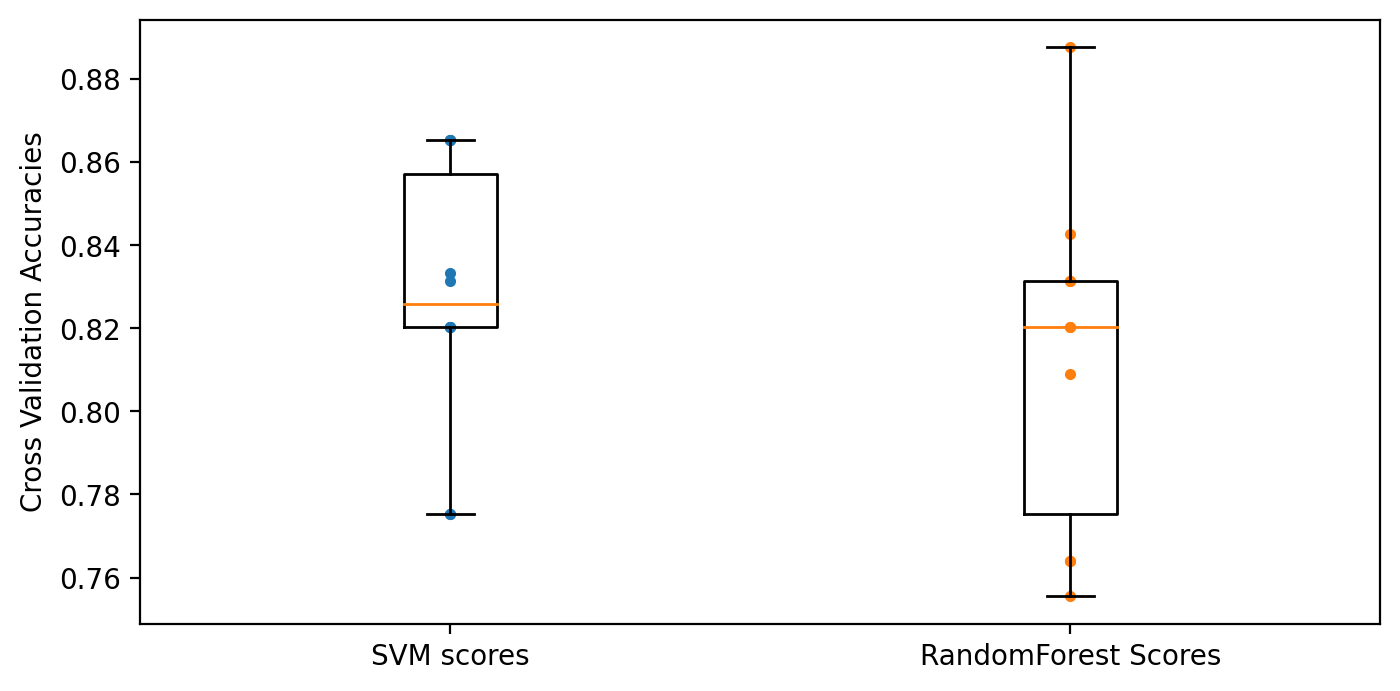

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4),dpi=200)
plt.plot([1]*10,scores,'.')
plt.plot([2]*10,rf_scores,'.')
plt.boxplot([scores,rf_scores],labels=('SVM scores','RandomForest Scores'))
plt.ylabel('Cross Validation Accuracies')

In [112]:
train_data['Age_bucket'] = train_data['Age'] // 15 * 15
train_data[['Age_bucket','Survived']].groupby(['Age_bucket']).mean()

,Survived
Age_bucket,
0.0,0.576923
15.0,0.362745
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


In [89]:
train_data['Total_relatives'] = train_data['SibSp'] + train_data['Parch']
train_data[['Total_relatives','Survived']].groupby(['Total_relatives']).mean() * 100 

,Survived
Total_relatives,
0,30.353818
1,55.279503
2,57.843137
3,72.413793
4,20.000000
5,13.636364
6,33.333333
7,0.000000
10,0.000000


In [115]:
svc_clf.fit(X_train,y_train)
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [116]:
from sklearn.metrics import auc,classification_report
print("SVM",classification_report(y_val,svc_clf.predict(X_val)))


SVM               precision    recall  f1-score   support

           0       0.80      0.91      0.85       105
           1       0.85      0.68      0.75        74

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



In [122]:
print("RndFrst",classification_report(y_val,rf_clf.predict(X_val)))

RndFrst               precision    recall  f1-score   support

           0       0.85      0.86      0.85       105
           1       0.79      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

